## CNN for Recognizing and Predicting Flower Types

In this project, flower recognition and prediction is implemented using the Convolution Neural Network (CNN). The dataset consists of 5 different types of flowers totaling upto ~240MBs in data size, with the project aimed at implementing supervised machine learning technique in this data mining task by predicting the type of any given flower based on its given image. Sequential model using Keras shall be built and used as the base model for this CNN-based project.

#### Notebook Settings

In [1]:
# notebook settings
import warnings
warnings.filterwarnings("ignore")

#### Download Dataset

In [2]:
from google.colab import files
import os

# upload kaggle.json only if not already uploaded
if not(os.path.exists("kaggle.json")):
  files.upload()
else:
  print("'kaggle.json' already uploaded")

Saving kaggle.json to kaggle.json


In [3]:
# install kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=ceda28269ff51e8e19e5939be4bad28f806e15a90d08a0e061eba51ae19f7530
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [4]:
# prepare kaggle for upload
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
# download dataset
dataset_url = "alxmamaev/flowers-recognition"
dataset_name = dataset_url.split("/")[-1]

In [6]:
# download dataset
!kaggle datasets download -d  {dataset_url}

 94% 211M/225M [00:01<00:00, 260MB/s]
100% 225M/225M [00:01<00:00, 183MB/s]


In [7]:
# unzip dataset
!mkdir {dataset_name}
!unzip -q {dataset_name}.zip -d {dataset_name}

In [8]:
# remove zip file
!rm -f {dataset_name}.zip
!ls

flowers-recognition  kaggle.json  sample_data


#### Import required libraries

In [9]:
# install required libraries
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.0 MB/s 


In [58]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras, cv2, random
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

#### Exploratory Data Analysis (EDA)

In [12]:
# Create X and Y data
x_ = list()
y = list()
y_ = list()
IMG_SIZE = 128
for i in os.listdir(f"{dataset_name}/flowers/daisy"):
    try:
        path = f"{dataset_name}/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
        y_.append("Daisy")
    except:
        None
for i in os.listdir(f"{dataset_name}/flowers/dandelion"):
    try:
        path = f"{dataset_name}/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
        y_.append("Dandelion")
    except:
        None
for i in os.listdir(f"{dataset_name}/flowers/rose"):
    try:
        path = f"{dataset_name}/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
        y_.append("Rose")
    except:
        None
for i in os.listdir(f"{dataset_name}/flowers/sunflower"):
    try:
        path = f"{dataset_name}/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
        y_.append("Sunflower")
    except:
        None
for i in os.listdir(f"{dataset_name}/flowers/tulip"):
    try:
        path = f"{dataset_name}/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
        y_.append("Tulip")
    except:
        None
x_ = np.array(x_)

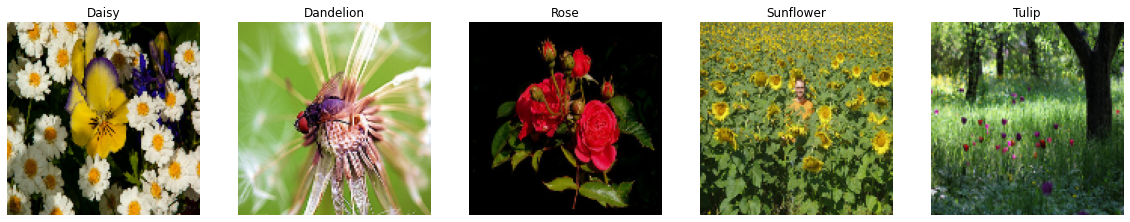

In [13]:
# plot single flower in all types
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_[950*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_[950*i])

#### Data Preparation

In [14]:
# use to_categorical function of keras for replacement
y = to_categorical(y,num_classes = 5)

# train and test split
x_train, x_test, y_train, y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

# validation and trains split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

# look at training shape
x_train.shape

(3118, 128, 128, 3)

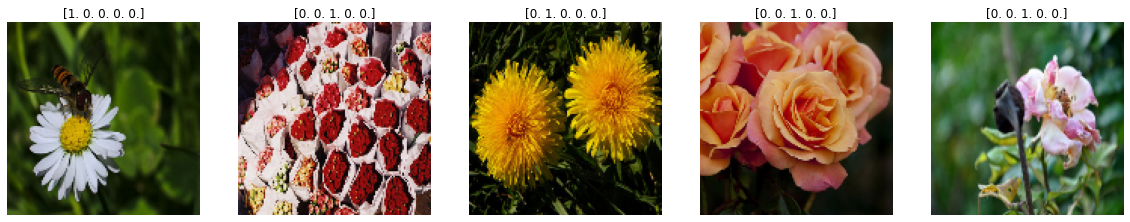

In [15]:
# plot random flowers in train set
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_train[600*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[600*i])
plt.show()

#### Creating CNN model

In [16]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Add output layer
model.add(Dense(5,activation="softmax"))

model.summary() # print summary my model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0

In [17]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [18]:
# Create a data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=60,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

#### Train and Test the Model

In [19]:
epoch = 50 
batch_size = 64

In [20]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // batch_size
                              )

Epoch 1/50
48/48 [==============================] - 27s 284ms/step - loss: 1.6300 - accuracy: 0.4420 - val_loss: 7.0785 - val_accuracy: 0.3702
Epoch 2/50
48/48 [==============================] - 12s 243ms/step - loss: 1.2445 - accuracy: 0.5435 - val_loss: 1.9388 - val_accuracy: 0.4537
Epoch 3/50
48/48 [==============================] - 14s 292ms/step - loss: 1.1291 - accuracy: 0.5740 - val_loss: 2.1343 - val_accuracy: 0.5426
Epoch 4/50
48/48 [==============================] - 12s 241ms/step - loss: 1.0131 - accuracy: 0.6261 - val_loss: 1.6222 - val_accuracy: 0.6007
Epoch 5/50
48/48 [==============================] - 12s 244ms/step - loss: 0.9875 - accuracy: 0.6231 - val_loss: 0.9825 - val_accuracy: 0.6624
Epoch 6/50
48/48 [==============================] - 12s 255ms/step - loss: 0.8920 - accuracy: 0.6713 - val_loss: 1.1479 - val_accuracy: 0.6189
Epoch 7/50
48/48 [==============================] - 12s 242ms/step - loss: 0.8595 - accuracy: 0.6735 - val_loss: 0.9656 - val_accuracy: 0.6697

#### Results

In [21]:
# test accuracy
print("Accuracy = {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100))

21/21 [==============================] - 1s 25ms/step - loss: 0.8538 - accuracy: 0.7377
Accuracy = 73.77%


In [22]:
x_ = np.array(range(len(history.history['loss']))) 
trace1 = go.Scatter(
        x = x_,
        y = history.history['loss'], 
        mode = "lines",
        marker = dict(color = "rgba(0,255,0,0.9)"),
        text = "Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['accuracy'],
        mode = "lines",
        marker = dict(color = "rgba(0,0,255,0.9)"),
        text = "Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Training Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

In [23]:
x_ = np.array(range(len(history.history['val_loss'])))
trace1 = go.Scatter(
        x = x_,
        y = history.history['val_loss'],
        mode = "lines",
        marker = dict(color = "rgba(0,0,0,0.9)"),
        text = "Validation Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['val_accuracy'],
        mode = "lines",
        marker = dict(color = "rgba(255,0,0,0.9)"),
        text = "Validation Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Validation Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

In [24]:
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)

18/18 [==============================] - 0s 9ms/step


In [50]:
# get sample properly classified and misclassified images
prop_class=[]
mis_class=[]
max_images = 9

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==Y_pred_classes[i]):
        prop_class.append(i)
    if(len(prop_class)==max_images):
        break

for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==Y_pred_classes[i]):
        mis_class.append(i)
    if(len(mis_class)==max_images):
        break

In [51]:
le = LabelEncoder()
Y = le.fit_transform(y_)
Y = to_categorical(Y,5)
X = np.array(x_)
X = X/255

In [52]:
Y_test_classes = np.argmax(y_test,axis = 1)

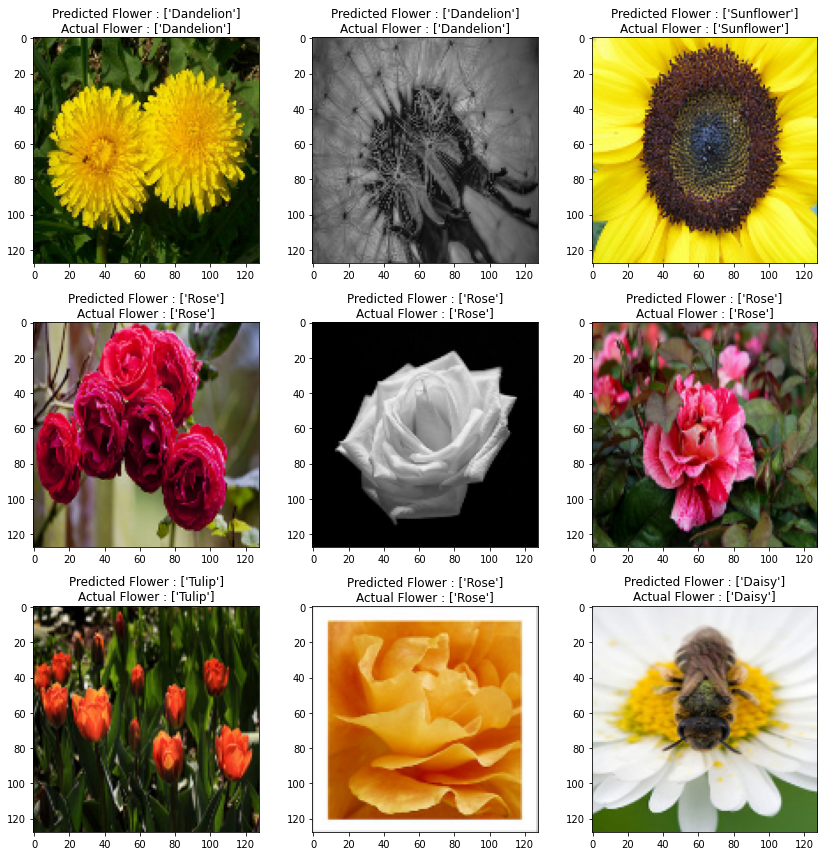

In [54]:
# correctly classified
count=0
fig,ax=plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range (3):
    for j in range (3):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([Y_pred_classes[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]], axis=1))))
        plt.tight_layout() 
        count+=1

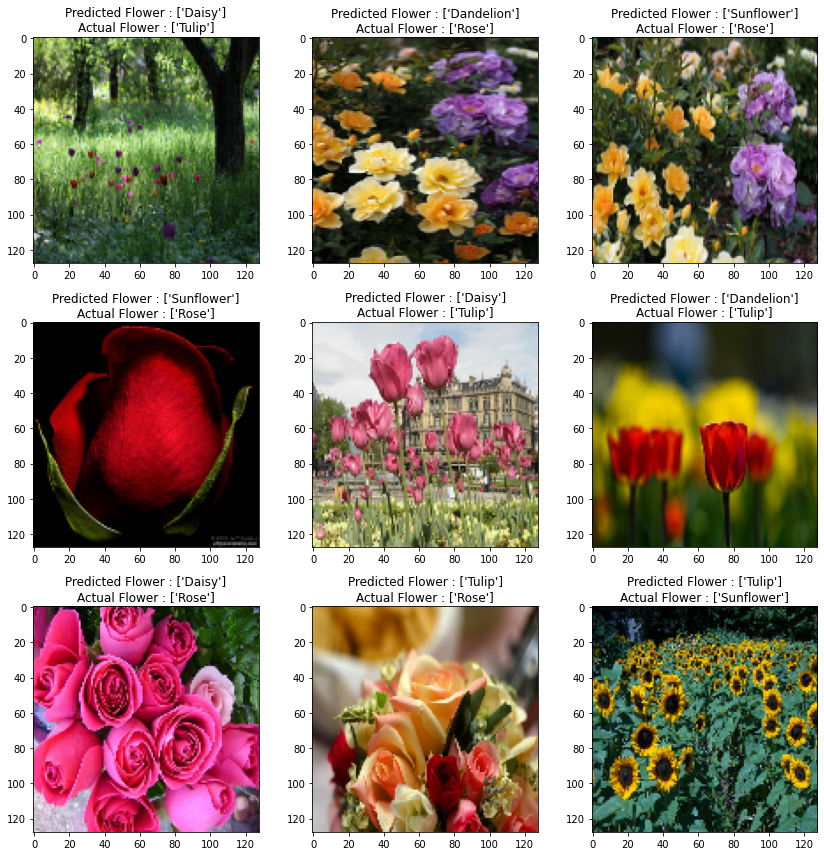

In [55]:
# misclassified flowers
count=0
fig,ax=plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range (3):
    for j in range (3):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([Y_pred_classes[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]], axis=1))))
        plt.tight_layout() 
        count+=1

#### Confusion Matrix

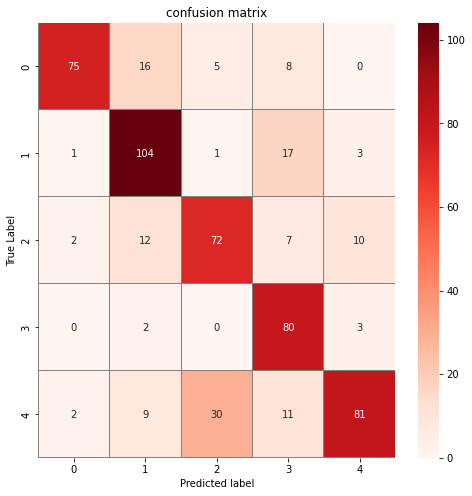

In [57]:
Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".0f",ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

#### Conclusion

The results of the project show that the Convolutional Neural Network model was able to achieve a high degree of accuracy in both recognizing and predicting the five different types of flowers in the dataset. The model was able to train and test on the dataset with an accuracy score of 73.77%. This accuracy score is a testament to the effectiveness of the CNN model in recognizing and predicting the kinds of flowers contained in the dataset. The project has shown that the CNN model is a viable choice for recognizing and predicting flower types. The model may also be used to classify and predict other flower species in the future, as well as other types of objects. Overall, this project has demonstrated the potential of CNNs in flower recognition and prediction and has provided a successful tool for identifying, predicting, and classifying different kinds of flowers. In the future, more experiments and analysis can be done to further improve the accuracy of the flower recognition model.
